In [1]:
# -*- coding:utf-8 -*-
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

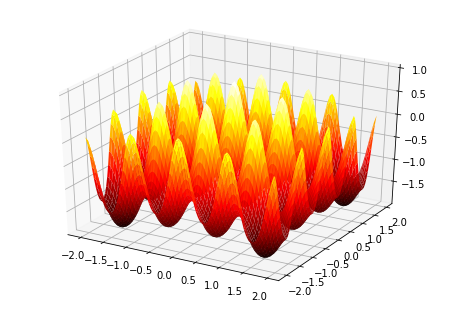

In [3]:
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-2,2,0.05)
Y = np.arange(-2,2,0.05)
X , Y = np.meshgrid(X,Y)
Z = np.sin(np.sqrt(X**2+Y**2))/np.sqrt(X**2+Y**2)+np.exp((np.cos(2*np.pi*X)+np.cos(2*np.pi*Y))/2)-2.71289
ax.plot_surface(X,Y,Z,rstride=1, cstride=1, cmap='hot')
plt.show()

此处使用mpl_toolkits.mplot3d画3D图，在代码中，分别使用numpy中的arange创建等差长度为0.05的数据点向量，
区间为[-2,2]之间，然后使用meshgrid将向量转换给对应的矩阵，这样的话，后面的函数式中就可以使用np中的三角函数和数学函数了，
如果不这样的话，还得一个一个点的根据公式去做循环，拼接Z的向量点。
运行出来的图如上：

In [53]:
class PSO(object):
    
    def __init__(self):
        self.w = self.getweight()
        self.lr = self.getlearningrate()
        self.maxgen = self.getmaxgen()
        self.sizepop = self.getsizepop()
        self.rangepop = self.getrangepop()
        self.rangespeed = self.getrangespeed() 
    def getweight(self):
        # 惯性权重
        weight = 1
        return weight
    def getlearningrate(self):
        # 分别是粒子的个体和社会的学习因子，也称为加速常数
        lr = (0.49445,1.49445)
        return lr
    def getmaxgen(self):
        # 最大迭代次数
        maxgen = 300
        return maxgen
    def getrangepop(self):
        # 粒子的位置的范围限制，x，y的方向的限制相同
        rangepop = (-2,2)
        return rangepop
    def getrangespeed(self):
        # 粒子的速度范围限制
        rangespeed = (-0.5,0.5)
        return rangespeed
    def getsizepop(self):
        # 种群规模
        sizepop = 20
        return sizepop
    # 适应度函数
    def func(self,x):
        # x:输入粒子位置
        # y：粒子适应度值
        if (x[0]==0)&(x[1]==0):
            y = np.exp((np.cos(2*np.pi*x[0])+np.cos(2*np.pi*x[1]))/2)-2.71289
        else:
            y = np.sin(np.sqrt(x[0]**2+x[1]**2))/np.sqrt(x[0]**2+x[1]**2)+np.exp((np.cos(2*np.pi*x[0])+np.cos(2*np.pi*x[1]))/2)-2.71289
        return y
    # 初始化粒子和计算适应度值
    def initpopvfit(self,sizepop):
        pop = np.zeros((sizepop,2))
        v = np.zeros((sizepop,2))
        fitness = np.zeros(sizepop)
        for i in range(sizepop):
            pop[i] = [(np.random.rand()-0.5)*self.rangepop[0]*2,(np.random.rand()-0.5)*self.rangepop[1]*2]
            v[i] = [(np.random.rand()-0.5)*self.rangepop[0]*2,(np.random.rand()-0.5)*self.rangepop[1]*2]
            fitness[i] = self.func(pop[i])
        return pop,v,fitness
    # 寻找初始化后的极值
    def getinitbest(self,fitness,pop):

        # 群体最优的粒子位置及其适应度值
        gbestpop , gbestfitness = pop[fitness.argmax()].copy(),fitness.max()

         #个体最优的粒子位置及其适应度值,使用copy()使得对pop的改变不影响pbestpop，pbestfitness类似
        pbestpop , pbestfitness = pop.copy() , fitness.copy()

        return gbestpop,gbestfitness,pbestpop,pbestfitness
    # 迭代寻优
    def run(self):
        pop,v,fitness = self.initpopvfit(self.sizepop)
        gbestpop,gbestfitness,pbestpop,pbestfitness = self.getinitbest(fitness,pop)
        result = np.zeros(self.maxgen)

        for i in range(self.maxgen):
            # 速度更新
            for j in range(self.sizepop):
                v[j] += self.lr[0] * np.random.rand() * (pbestpop[j] - pop[j]) + self.lr[1] * np.random.rand() *(gbestpop - pop[j])
            v[v < self.rangespeed[0]] = self.rangespeed[0]
            v[v > self.rangespeed[1]] = self.rangespeed[1]

            # 粒子位置更新
            for j in range(self.sizepop):
                pop[j] += 0.5 * v[j]
            pop[pop < self.rangepop[0]] = self.rangepop[0]
            pop[pop > self.rangepop[1]] = self.rangepop[1]

            # 适应度更新
            for j in range(self.sizepop):
                fitness[j] = self.func(pop[j])

            for j in range(self.sizepop):
                if fitness[j] > pbestfitness[j]:
                    pbestfitness[j] = fitness[j]
                    pbestpop[j] = pop[j].copy()

            if pbestfitness.max() > gbestfitness:
                gbestfitness = pbestfitness.max()
                gbestpop = pop[pbestfitness.argmax()].copy()

            result[i] = gbestfitness
        return result

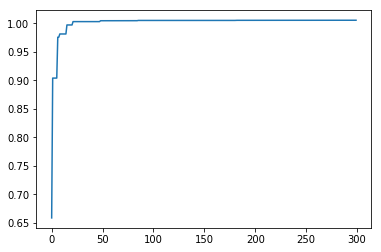

In [54]:
pso = PSO()
result = pso.run()
plt.figure()
plt.plot(result)
plt.show()